<a href="https://colab.research.google.com/github/vikramkrishnan9885/MyColab/blob/master/SingleObjectSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!unzip '/content/drive/My Drive/img_seg/test_set.zip'

Archive:  /content/drive/My Drive/img_seg/test_set.zip
   creating: test_set/
  inflating: test_set/000_HC.png     
 extracting: test_set/001_HC.png     
 extracting: test_set/002_HC.png     
 extracting: test_set/003_HC.png     
 extracting: test_set/004_HC.png     
 extracting: test_set/005_HC.png     
 extracting: test_set/006_HC.png     
 extracting: test_set/007_HC.png     
 extracting: test_set/008_HC.png     
  inflating: test_set/009_HC.png     
 extracting: test_set/010_HC.png     
 extracting: test_set/011_HC.png     
  inflating: test_set/012_HC.png     
 extracting: test_set/013_HC.png     
 extracting: test_set/014_HC.png     
  inflating: test_set/015_HC.png     
 extracting: test_set/016_HC.png     
 extracting: test_set/017_HC.png     
 extracting: test_set/018_HC.png     
 extracting: test_set/019_HC.png     
 extracting: test_set/020_HC.png     
 extracting: test_set/021_HC.png     
 extracting: test_set/022_HC.png     
 extracting: test_set/023_HC.png     
 extractin

In [3]:
!unzip '/content/drive/My Drive/img_seg/training_set.zip'

Archive:  /content/drive/My Drive/img_seg/training_set.zip
   creating: training_set/
 extracting: training_set/000_HC.png  
  inflating: training_set/000_HC_Annotation.png  
 extracting: training_set/001_HC.png  
  inflating: training_set/001_HC_Annotation.png  
 extracting: training_set/002_HC.png  
  inflating: training_set/002_HC_Annotation.png  
 extracting: training_set/003_HC.png  
  inflating: training_set/003_HC_Annotation.png  
 extracting: training_set/004_HC.png  
  inflating: training_set/004_HC_Annotation.png  
 extracting: training_set/005_HC.png  
  inflating: training_set/005_HC_Annotation.png  
 extracting: training_set/006_HC.png  
  inflating: training_set/006_HC_Annotation.png  
 extracting: training_set/007_HC.png  
  inflating: training_set/007_HC_Annotation.png  
 extracting: training_set/008_HC.png  
  inflating: training_set/008_HC_Annotation.png  
 extracting: training_set/009_HC.png  
  inflating: training_set/009_HC_Annotation.png  
 extracting: training_se

In [4]:
import os
path2train="./training_set/"

imgsList=[pp for pp in os.listdir(path2train) if "Annotation" not in pp]
anntsList=[pp for pp in os.listdir(path2train) if "Annotation" in pp]
print("number of images:", len(imgsList))
print("number of annotations:", len(anntsList))

number of images: 999
number of annotations: 999


In [5]:
import numpy as np
np.random.seed(2019)
rndImgs=np.random.choice(imgsList,4)
rndImgs

array(['502_HC.png', '780_HC.png', '125_HC.png', '753_HC.png'],
      dtype='<U11')

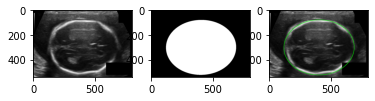

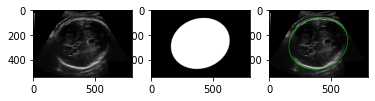

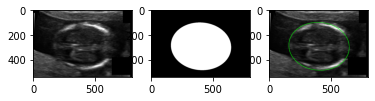

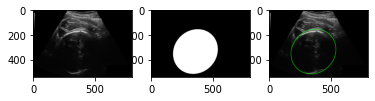

In [6]:
import matplotlib.pylab as plt
from PIL import Image
from scipy import ndimage as ndi
from skimage.segmentation import mark_boundaries
from torchvision.transforms.functional import to_tensor, to_pil_image
import torch

# Define a helper function to show an image and its annotation:
def show_img_mask(img, mask):
    if torch.is_tensor(img):
        img=to_pil_image(img)
        mask=to_pil_image(mask)
        
    img_mask=mark_boundaries(np.array(img), 
                        np.array(mask),
                        outline_color=(0,1,0),
                        color=(0,1,0))
    plt.imshow(img_mask)



for fn in rndImgs:
    path2img = os.path.join(path2train, fn)
    path2annt= path2img.replace(".png", "_Annotation.png")
    img = Image.open(path2img)
    annt_edges = Image.open(path2annt)
    mask = ndi.binary_fill_holes(annt_edges)        

    plt.figure()
    plt.subplot(1, 3, 1) 
    plt.imshow(img, cmap="gray")

    plt.subplot(1, 3, 2) 
    plt.imshow(mask, cmap="gray")

    plt.subplot(1, 3, 3) 
    show_img_mask(img, mask)

(-0.5, 799.5, 539.5, -0.5)

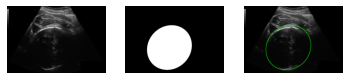

In [7]:
plt.figure()
plt.subplot(1, 3, 1) 
plt.imshow(img, cmap="gray")
plt.axis('off')

plt.subplot(1, 3, 2) 
plt.imshow(mask, cmap="gray")
plt.axis('off')    

plt.subplot(1, 3, 3) 
show_img_mask(img, mask)
plt.axis('off')

# Data augmentation


In step 2, we displayed a few random images and annotations. We defined a helper function, show_img_mask, to show an image and an overlay. The inputs to the helper function were as follows:

* image: A PIL image
* mask: A PIL or numpy array containing the binary mask of the object
In the function, we used mark_boundaries from the skimage.segmentation package to overlay the mask on the image.

Note that the annotation files contain the edges of the fetal head. As such, we converted the edges to binary masks using the binary_fill_holes function from the scipy.ndimage package. The screenshot displayed original ultrasound images on the left, binary masks of the fetal heads in the middle, and the image overlay on the right.

In the Data augmentation subsection, we used a popular Python package called albumentations for data transformation. For the first time, you needed to install the package, as shown in step 1. Make sure that you install the package in the conda environment that we created for this book. The package has a rich set of various augmentation and transformation techniques. In step 2, we imported a few of these packages. Next, for the training dataset, we composed a vertical and horizontal flip, resizing the images to 128 x 192. For the validation dataset, we only performed the resizing transformation. We will pass these transformations to the PyTorch dataset class in the next subsection.

In [0]:
from albumentations import (
    HorizontalFlip,
    VerticalFlip,    
    Compose,
    Resize,
)

h,w=128,192
transform_train = Compose(
  [
    Resize(h,w), 
    HorizontalFlip(p=0.5), 
    VerticalFlip(p=0.5), 
  ]
)


transform_val = Resize(h,w)

999
999
torch.Size([1, 128, 192]) torch.FloatTensor tensor(0.9412)
torch.Size([1, 128, 192]) torch.FloatTensor tensor(1.)


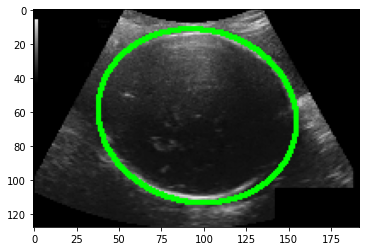

In [9]:
# Creating Custom Dataset


from torch.utils.data import Dataset
from PIL import Image
from torchvision.transforms.functional import to_tensor, to_pil_image

class fetal_dataset(Dataset):
    def __init__(self, path2data, transform=None):      

        imgsList=[pp for pp in os.listdir(path2data) if "Annotation" not in pp]
        anntsList=[pp for pp in os.listdir(path2train) if "Annotation" in pp]

        self.path2imgs = [os.path.join(path2data, fn) for fn in imgsList] 
        self.path2annts= [p2i.replace(".png", "_Annotation.png") for p2i in self.path2imgs]

        self.transform = transform
    
    def __len__(self):
        return len(self.path2imgs)
      
    def __getitem__(self, idx):
        path2img = self.path2imgs[idx]
        image = Image.open(path2img)

        path2annt = self.path2annts[idx]
        annt_edges = Image.open(path2annt)
        mask = ndi.binary_fill_holes(annt_edges)        
        
        image= np.array(image)
        mask=mask.astype("uint8")        

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']           

        # Note that we converted the arrays to PyTorch tensors using the 
        #  to_tensor function at the end. 
        # The to_tensor function normalizes the values by diving them to 255. 
        # As such, we scaled back the mask values to the range of [0, 1] by multiplying it by 255. 

        image= to_tensor(image)            
        mask=255*to_tensor(mask)            
        return image, mask


fetal_ds1=fetal_dataset(path2train, transform=transform_train)
fetal_ds2=fetal_dataset(path2train, transform=transform_val)
print(len(fetal_ds1))
print(len(fetal_ds2))


img,mask=fetal_ds1[0]
print(img.shape, img.type(),torch.max(img))
print(mask.shape, mask.type(),torch.max(mask))


show_img_mask(img, mask)

In [10]:
# Split data into train validation

from sklearn.model_selection import ShuffleSplit

sss = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

indices=range(len(fetal_ds1))

for train_index, val_index in sss.split(indices):
    print(len(train_index))
    print("-"*10)
    print(len(val_index))


from torch.utils.data import Subset

train_ds=Subset(fetal_ds1,train_index)
print(len(train_ds))

val_ds=Subset(fetal_ds2,val_index)
print(len(val_ds))

799
----------
200
799
200


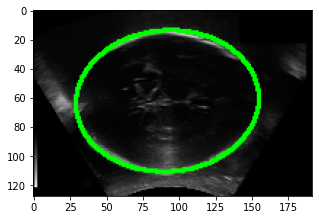

In [11]:
plt.figure(figsize=(5,5))
for img,mask in train_ds:
    show_img_mask(img,mask)
    break

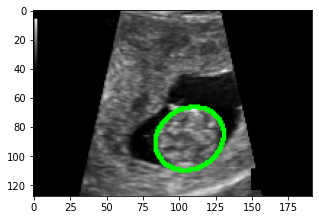

In [12]:
plt.figure(figsize=(5,5))
for img,mask in val_ds:
    show_img_mask(img,mask)
    break

In [14]:
# Creating DataLoader

from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds, batch_size=8, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=16, shuffle=False)

for img_b, mask_b in train_dl:
    print(img_b.shape,img_b.dtype)
    print(mask_b.shape, mask_b.dtype)
    break

for img_b, mask_b in val_dl:
    print(img_b.shape,img_b.dtype)
    print(mask_b.shape, mask_b.dtype)
    break

torch.max(img_b)

torch.Size([8, 1, 128, 192]) torch.float32
torch.Size([8, 1, 128, 192]) torch.float32
torch.Size([16, 1, 128, 192]) torch.float32
torch.Size([16, 1, 128, 192]) torch.float32


tensor(0.9529)

In [15]:
# Creating the Model

import torch.nn as nn
import torch.nn.functional as F


class SegNet(nn.Module):
    def __init__(self, params):
        super(SegNet, self).__init__()
        
        C_in, H_in, W_in=params["input_shape"]
        init_f=params["initial_filters"] 
        num_outputs=params["num_outputs"] 

        self.conv1 = nn.Conv2d(C_in, init_f, kernel_size=3,stride=1,padding=1)
        self.conv2 = nn.Conv2d(init_f, 2*init_f, kernel_size=3,stride=1,padding=1)
        self.conv3 = nn.Conv2d(2*init_f, 4*init_f, kernel_size=3,padding=1)
        self.conv4 = nn.Conv2d(4*init_f, 8*init_f, kernel_size=3,padding=1)
        self.conv5 = nn.Conv2d(8*init_f, 16*init_f, kernel_size=3,padding=1)

        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

        self.conv_up1 = nn.Conv2d(16*init_f, 8*init_f, kernel_size=3,padding=1)
        self.conv_up2 = nn.Conv2d(8*init_f, 4*init_f, kernel_size=3,padding=1)
        self.conv_up3 = nn.Conv2d(4*init_f, 2*init_f, kernel_size=3,padding=1)
        self.conv_up4 = nn.Conv2d(2*init_f, init_f, kernel_size=3,padding=1)

        self.conv_out = nn.Conv2d(init_f, num_outputs , kernel_size=3,padding=1)    
    
    def forward(self, x):
        
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv3(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv4(x))
        x = F.max_pool2d(x, 2, 2)

        x = F.relu(self.conv5(x))

        x=self.upsample(x)
        x = F.relu(self.conv_up1(x))

        x=self.upsample(x)
        x = F.relu(self.conv_up2(x))
        
        x=self.upsample(x)
        x = F.relu(self.conv_up3(x))
        
        x=self.upsample(x)
        x = F.relu(self.conv_up4(x))

        x = self.conv_out(x)
        
        return x

# The dictionary keys are as follows:
# inupt_shape: A tuple, the model input shape (1, height, width)
# initial_filters: An integer, the number of filters in the first CNN layer
# num_outputs: An integer, the number of output channels; pass 1 for single-object segmentation
params_model= {
  "input_shape": (1,h,w),
  "initial_filters": 16, 
  "num_outputs": 1,
}

model = SegNet(params_model)



import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model=model.to(device)
print(model)



from torchsummary import summary
summary(model, input_size=(1, h, w))

SegNet(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (upsample): Upsample(scale_factor=2.0, mode=bilinear)
  (conv_up1): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_up2): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_up3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_up4): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_out): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv

# Helper functions

In [0]:
# Define Loss Function

# We defined the dice_loss helper function to calculate the dice loss value. The inputs to the function were as follows:
# pred: A tensor with a (batch_size, 1, height, width) shape, corresponding to predictions
# target: A tensor with a (batch_size, 1, height, width) shape, corresponding to the ground truth
# The function calculates the dice value per data batch. The dice value is between [0, 1], 
# where a value of 1 represents a perfect overlap between the prediction and the ground truth. 
# The dice loss is calculated as (1- dice), since we wanted to minimize the value. 
# The function returns the sum of loss values per data batch.

# We defined the loss_func helper function to compute the combined loss value per data batch. The function has two inputs:
# pred: A tensor with a (batch_size, 1, height, width) shape, corresponding to predictions
# target: A tensor with a (batch_size, 1, height, width) shape, corresponding to the ground truth
# In the function, we first calculated the binary cross-entropy loss. 
# Next, we calculated the dice loss and returned the sum of the two losses per data batch.

# Note that the sigmoid operation is integrated into the binary_cross_entropy_with_logits function. 
# Remember that the model output does not include the sigmoid activation function. 
# We defined the metrics_batch helper function to compute a metric per batch. 
# You can calculate any metric you want inside this helper function. 
# We calculated the dice metric by calling the dice_loss helper function.
# The dice metric is a popular metric for evaluating segmentation tasks.

# In step 4, we defined the loss_batch helper function. The inputs to the helper function are as follows:
# loss_func: Combined loss function defined in step 2
# output: A tensor with a (batch_size, 1, height, width) shape containing predictions
# target: A tensor with a (batch_size, 1, height, width) shape containing the ground truth
# opt: An object of the optimizer
# In the function, we calculated the loss and metric values per data batch. 
# During training, the optimizer object is passed to the helper function, 
# and, as a result, the model parameters are updated using opt.step(). 

def dice_loss(pred, target, smooth = 1e-5):

    intersection = (pred * target).sum(dim=(2,3))
    union= pred.sum(dim=(2,3)) + target.sum(dim=(2,3)) 
    
    dice= 2.0 * (intersection + smooth) / (union+ smooth)    
    loss = 1.0 - dice
    
    return loss.sum(), dice.sum()

import torch.nn.functional as F

def loss_func(pred, target):
    bce = F.binary_cross_entropy_with_logits(pred, target,  reduction='sum')
    
    pred= torch.sigmoid(pred)
    dlv, _ = dice_loss(pred, target)
    
    loss = bce  + dlv

    return loss


import torchvision

def metrics_batch(pred, target):
    pred= torch.sigmoid(pred)
    _, metric=dice_loss(pred, target)
    
    return metric



def loss_batch(loss_func, output, target, opt=None):   
    loss = loss_func(output, target)
    
    pred= torch.sigmoid(output)
    _, metric_b=dice_loss(pred, target)
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()

    return loss.item(), metric_b

In [17]:
for img_v,mask_v in val_dl:
    mask_v= mask_v[8:]
    break

for img_t,mask_t in train_dl:
    break
    
print(dice_loss(mask_v,mask_v))
loss_func(mask_v,torch.zeros_like(mask_v))

(tensor(0.), tensor(8.))


tensor(173041.6719)

In [24]:
# Optimizer

from torch import optim
opt = optim.Adam(model.parameters(), lr=3e-4)

from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

current_lr=get_lr(opt)
print('current lr={}'.format(current_lr))

current lr=0.0003


In [0]:
# Training the Model

# Helper functions

# We defined the loss_epoch helper function. The function inputs are as follows:
# model: An object of the model 
# loss_func: An object of the loss function
# dataset_dl: An object of the data loader
# sanity_check: A Boolean flag; default value is False
# opt: An object of the optimizer

def loss_epoch(model,loss_func,dataset_dl,sanity_check=False,opt=None):
    running_loss=0.0
    running_metric=0.0
    len_data=len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        xb=xb.to(device)
        yb=yb.to(device)
        
        output=model(xb)
        loss_b, metric_b=loss_batch(loss_func, output, yb, opt)
        running_loss += loss_b
        
        if metric_b is not None:
            running_metric+=metric_b

        if sanity_check is True:
            break
    
    loss=running_loss/float(len_data)
    
    metric=running_metric/float(len_data)
    
    return loss, metric

# we defined the train_val helper function. The inputs to the function are as follows:
# model: An object of the mode
# params: A Python dictionary containing the training parameters

import copy
def train_val(model, params):
    num_epochs=params["num_epochs"]
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    val_dl=params["val_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]
    
    loss_history={
        "train": [],
        "val": []}
    
    metric_history={
        "train": [],
        "val": []}    
    
    
    best_model_wts = copy.deepcopy(model.state_dict())
    best_loss=float('inf')    
    
    for epoch in range(num_epochs):
        current_lr=get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs - 1, current_lr))   

        model.train()
        train_loss, train_metric=loss_epoch(model,loss_func,train_dl,sanity_check,opt)

        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=loss_epoch(model,loss_func,val_dl,sanity_check)
       
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)   
        
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
            
            torch.save(model.state_dict(), path2weights)
            print("Copied best model weights!")
            
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts) 
            
        print("train loss: %.6f, dice: %.2f" %(train_loss,100*train_metric))
        print("val loss: %.6f, dice: %.2f" %(val_loss,100*val_metric))
        print("-"*10) 
        

    model.load_state_dict(best_model_wts)
    return model, loss_history, metric_history

In [26]:
from torch import optim
opt = optim.Adam(model.parameters(), lr=3e-4)

from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=20,verbose=1)

path2models= "./models/"
if not os.path.exists(path2models):
        os.mkdir(path2models)

params_train={
    "num_epochs": 10,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": val_dl,
    "sanity_check": False,
    "lr_scheduler": lr_scheduler,
    "path2weights": path2models+"weights.pt",
}

model,loss_hist,metric_hist=train_val(model,params_train)

Epoch 0/9, current lr=0.0003
Copied best model weights!
train loss: 8374.742178, dice: 55.65
val loss: 6502.457832, dice: 69.04
----------
Epoch 1/9, current lr=0.0003
Copied best model weights!
train loss: 6190.787410, dice: 70.99
val loss: 5255.061738, dice: 75.01
----------
Epoch 2/9, current lr=0.0003
Copied best model weights!
train loss: 4993.268847, dice: 75.84
val loss: 4431.951729, dice: 77.30
----------
Epoch 3/9, current lr=0.0003
Copied best model weights!
train loss: 4097.803888, dice: 79.63
val loss: 3638.054990, dice: 82.06
----------
Epoch 4/9, current lr=0.0003
Copied best model weights!
train loss: 3353.183496, dice: 82.85
val loss: 3072.403628, dice: 84.56
----------
Epoch 5/9, current lr=0.0003
Copied best model weights!
train loss: 2888.798631, dice: 85.21
val loss: 2539.255024, dice: 88.10
----------
Epoch 6/9, current lr=0.0003
Copied best model weights!
train loss: 2464.739296, dice: 87.55
val loss: 2300.166621, dice: 88.92
----------
Epoch 7/9, current lr=0.000

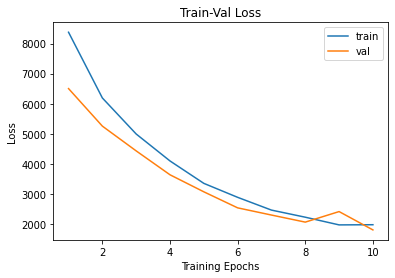

In [27]:
num_epochs=params_train["num_epochs"]

plt.title("Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

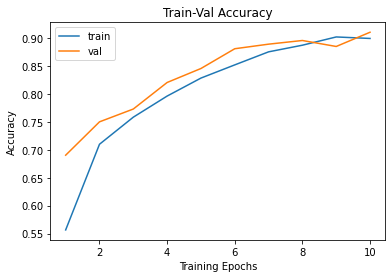

In [28]:
# plot accuracy progress
plt.title("Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()